<a href="https://colab.research.google.com/github/fazatra/PVCK_Genap_2023/blob/master/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

In [16]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 60


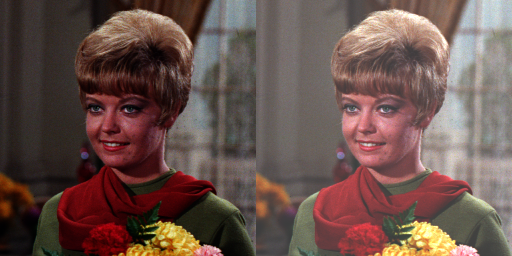

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum

# 1. Implementasikan inverse citra

Mengubah menjadi citra inversi
--------------------------------


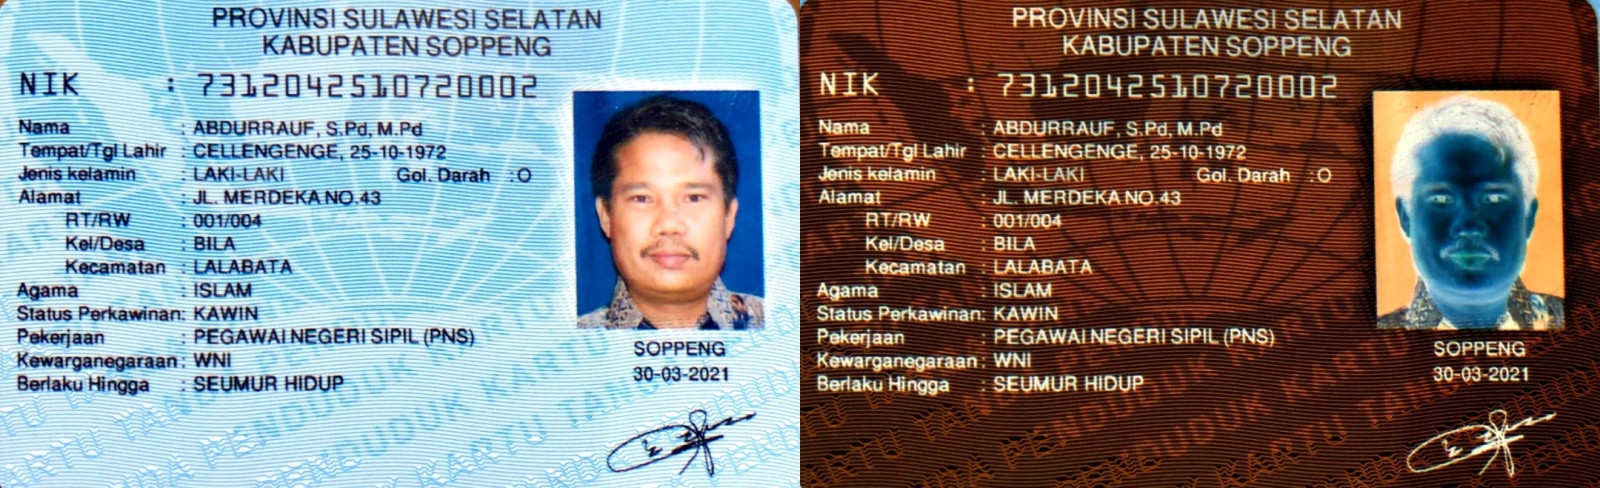

In [83]:
print('Mengubah menjadi citra inversi')
print('--------------------------------')

# Baca citra
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Periksa apakah citra berhasil dibaca
if original is None:
    print('Gagal membaca citra.')
else:
    # Mengubah citra menjadi citra inversi
    inverse_image = 255 - original

    # Menampilkan citra asli dan citra inversi
    final_frame = cv.hconcat((original, inverse_image))
    cv2_imshow(final_frame)

# 2. Implementasikan transformasi contrast

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


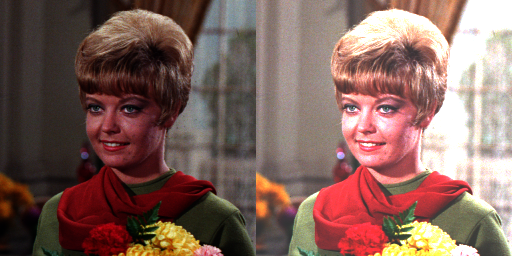

In [32]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

# 3. Implementasikan transformasi logarithmic brightness


 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


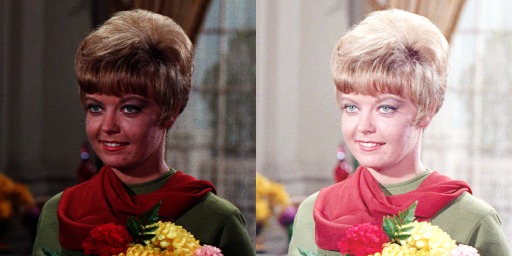

In [38]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance

In [69]:
# AVERAGING

import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Membaca citra
image_path = ('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
image = cv2.imread(image_path)

print('a. Averaging')
# Konversi citra ke grayscale menggunakan metode averaging
gray_image = np.mean(image, axis=2).astype(np.uint8)

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra Grayscale (Averaging)')
plt.imshow(gray_image, cmap='gray')
plt.axis('on')

plt.show()

a. Averaging


b. Lightness


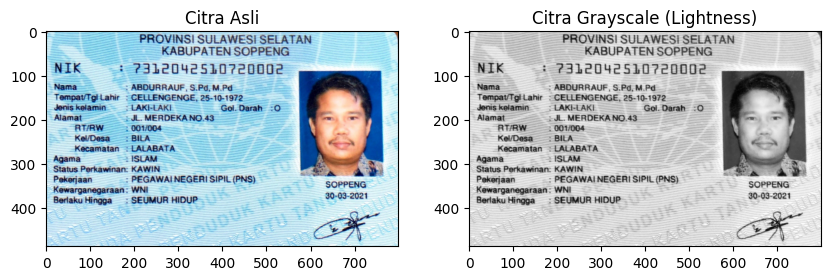

In [71]:
# LIGHTNESS

import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Membaca citra
image_path = ('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
image = cv2.imread(image_path)

print('b. Lightness')
# Konversi citra ke grayscale menggunakan metode lightness
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2Luv)[:, :, 0]

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra Grayscale (Lightness)')
plt.imshow(gray_image, cmap='gray')
plt.axis('on')

plt.show()

In [78]:
# LUMINANCE

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma.extras import average

original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
inverse_image = np.zeros(original.shape, original.dtype)

print('C. Luminance')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
        r = original[y,x,2]
        g = original[y,x,1]
        b = original[y,x,0]

        luminance = int(0.21 * r + 0.72 * g + 0.07 * b)

        inverse_image[y,x,c] = np.clip(luminance, 0, 255)


plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('on')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(inverse_image, cv.COLOR_BGR2RGB))
plt.title('Citra Inversi')
plt.axis('on')

plt.show()

C. Luminance


# 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale

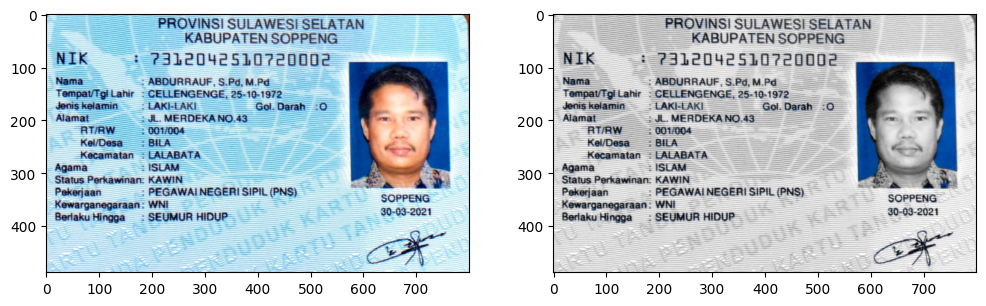

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
final_result = np.zeros_like(image)

# Tentukan rentang warna biru (sesuaikan jika perlu)
lower_blue = np.array([100, 0, 0])    # Batas bawah rentang warna biru (format BGR)
upper_blue = np.array([255, 100, 100])  # Batas atas rentang warna biru (format BGR)

# Dapatkan dimensi gambar
tinggi, lebar, kanal = image.shape

# Konversi gambar ke citra grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



# Perulangan untuk mengiterasi melalui semua piksel gambar
for y in range(tinggi):
    for x in range(lebar):
        # Dapatkan nilai warna BGR piksel saat ini
        piksel = image[y, x]

        # Periksa apakah piksel saat ini berada dalam batas warna biru
        if (piksel >= lower_blue).all() and (piksel <= upper_blue).all():
            final_result[y, x] = image[y, x]  # Biarkan piksel biru tetap seperti aslinya
        else:
            final_result[y, x] = [gray[y, x], gray[y, x], gray[y, x]]  # Ubah bagian non-biru menjadi grayscale

# Tampilkan citra asli dan hasilnya menggunakan Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))


plt.show()